# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [164]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata.head()
study_results.head()
Mouse_study_details = study_results.merge(mouse_metadata, on= "Mouse ID")
# Display the data table for preview
Mouse_study_details.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [165]:
# Checking the number of mice.
Mouse_study_details["Mouse ID"].nunique()

249

In [166]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ID = Mouse_study_details.loc[(Mouse_study_details.duplicated(subset = ["Mouse ID", "Timepoint"])),"Mouse ID"].unique()
duplicate_mouse_ID

array(['g989'], dtype=object)

In [167]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_lines = Mouse_study_details[Mouse_study_details["Mouse ID"]== "g989"]
duplicate_lines

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [168]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Mouse_study_details = Mouse_study_details[Mouse_study_details["Mouse ID"]!="g989"]
Mouse_study_details.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [169]:
# Checking the number of mice in the clean DataFrame.
Mouse_study_details["Mouse ID"].nunique()

248

## Summary Statistics

In [170]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
Tumour_size_vs_treatment = Mouse_study_details[["Drug Regimen","Tumor Volume (mm3)"]]
Tumour_size_vs_treatment = Tumour_size_vs_treatment.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = Tumour_size_vs_treatment["Tumor Volume (mm3)"].mean()
tumor_median = Tumour_size_vs_treatment["Tumor Volume (mm3)"].median()
tumor_var = Tumour_size_vs_treatment["Tumor Volume (mm3)"].var()
tumor_stdev = Tumour_size_vs_treatment["Tumor Volume (mm3)"].std()
tumor_sem = Tumour_size_vs_treatment["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
Tumour_size_vs_treatment = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                                         "Median Tumor Volume": tumor_median,
                                         "Tumor Volume Variance":tumor_var,
                                         "Tumor Volume Std. Dev.": tumor_stdev,
                                         "Tumor Volume Std. Err.": tumor_sem})
Tumour_size_vs_treatment


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [171]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
Tumour_size_vs_treatment  = pd.pivot_table(Mouse_study_details, values=["Tumor Volume (mm3)"], index=["Drug Regimen"],
                    aggfunc={"Tumor Volume (mm3)": [np.mean, np.median, np.var, np.std, st.sem]})
Tumour_size_vs_treatment

Tumor Volume (mm3)                                          
                           mean     median       sem       std        var
Drug Regimen                                                             
Capomulin             40.675741  41.557809  0.329346  4.994774  24.947764
Ceftamin              52.591172  51.776157  0.469821  6.268188  39.290177
Infubinol             52.884795  51.820584  0.492236  6.567243  43.128684
Ketapril              55.235638  53.698743  0.603860  8.279709  68.553577
Naftisol              54.331565  52.509285  0.596466  8.134708  66.173479
Placebo               54.033581  52.288934  0.581331  7.821003  61.168083
Propriva              52.320930  50.446266  0.544332  6.622085  43.852013
Ramicane              40.216745  40.673236  0.320955  4.846308  23.486704
Stelasyn              54.233149  52.431737  0.573111  7.710419  59.450562
Zoniferol             53.236507  51.818479  0.516398  6.966589  48.533355

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

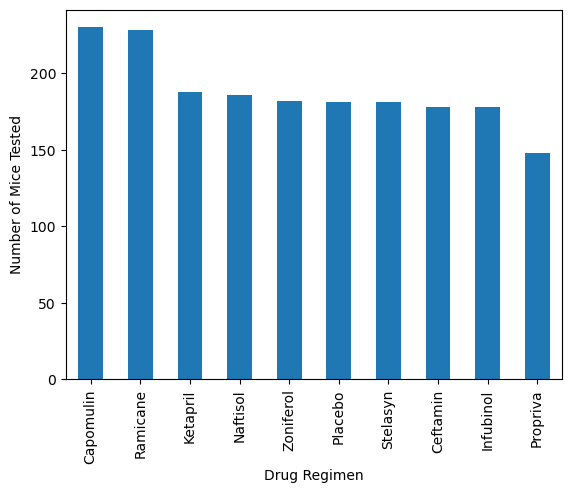

In [172]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

num_mice_tested = Mouse_study_details[["Drug Regimen", "Timepoint"]]
num_mice_tested = num_mice_tested.groupby("Drug Regimen").Timepoint.count().sort_values(ascending=False)
num_mice_tested = num_mice_tested.to_frame()
num_mice_tested = num_mice_tested.reset_index()
num_mice_tested.plot.bar("Drug Regimen","Timepoint", xlabel = "Drug Regimen", ylabel = "Number of Mice Tested", legend = False)



Text(0, 0.5, 'Number of Mice Tested')

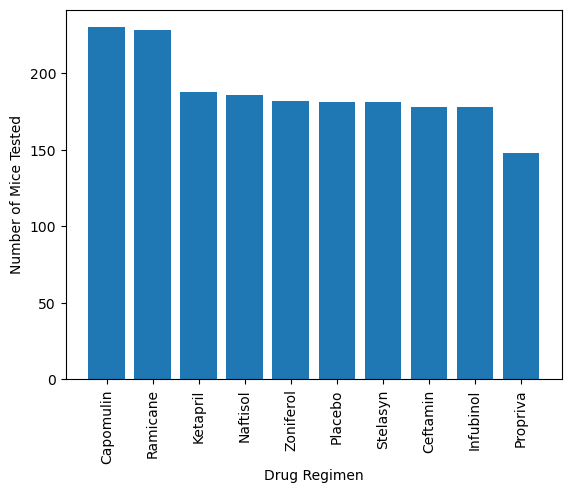

In [174]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimen= num_mice_tested["Drug Regimen"]
timepoint = num_mice_tested["Timepoint"]

plt.bar(drug_regimen,timepoint)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

Text(0, 0.5, 'Sex')

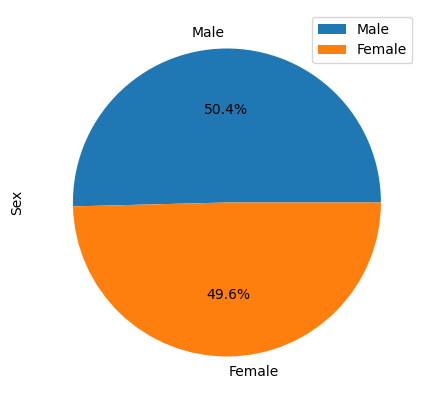

In [175]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_metadata = mouse_metadata[mouse_metadata["Mouse ID"]!="g989"]

sex_mice_tested = mouse_metadata[["Sex","Mouse ID"]]
sex_mice_tested = sex_mice_tested.rename(columns={"Mouse ID": "Mouse_ID_count"})
sex_mice_tested = sex_mice_tested.groupby("Sex").Mouse_ID_count.count().sort_values(ascending=False)
sex_mice_tested = sex_mice_tested.to_frame()

plot=sex_mice_tested.plot.pie(y="Mouse_ID_count", autopct = "%1.1f%%", figsize=(5, 5),)
plot.set_ylabel("Sex")

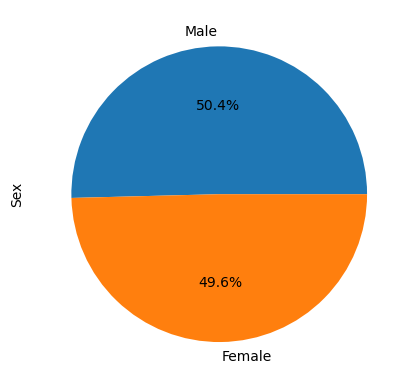

In [176]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_mice_tested = sex_mice_tested.reset_index()
Mouse_ID_count = sex_mice_tested["Mouse_ID_count"]
sex = sex_mice_tested["Sex"]
plt.pie(Mouse_ID_count,labels = sex , autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [177]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumour_size = study_results[study_results["Mouse ID"]!="g989"]
final_tumour_size = final_tumour_size[["Mouse ID", "Timepoint"]]
final_tumour_size = final_tumour_size.groupby("Mouse ID").Timepoint.max()
final_tumour_size = final_tumour_size.to_frame().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumour_size = final_tumour_size.merge(Mouse_study_details, on = ["Mouse ID", "Timepoint"])
final_tumour_size = final_tumour_size.rename(columns={"Mouse ID": "Mouse_ID", "Drug Regimen": "Drug_Regimen", "Tumor Volume (mm3)":"Tumor_Volume_mm3"})

In [178]:
# Put treatments into a list for for loop (and later for plot labels)

#for all treatments
#Treatments = final_tumour_size["Drug_Regimen"].unique().tolist()

#for treatments in the startercode
Treatments =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumour_vol = []

for i in range(0,len(Treatments)):
    obj = [row[2] for index, row in final_tumour_size.iterrows() if row[4]== Treatments[i]]
    tumour_vol.append(obj)

tumour_vol
for i in range(0,len(tumour_vol)):
    tumour_vol[i]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
for treatment in Treatments:
    quartiles = final_tumour_size["Tumor_Volume_mm3"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Quantitatively check for outliers
    outliers_count = (final_tumour_size["Tumor_Volume_mm3"].loc[(final_tumour_size['Tumor_Volume_mm3'] >= upper_bound) | 
                                        (final_tumour_size['Tumor_Volume_mm3'] <= lower_bound)]).count()
    print(f'Number of {treatment} outliers: {outliers_count}')

Number of Capomulin outliers: 0
Number of Ramicane outliers: 0
Number of Infubinol outliers: 0
Number of Ceftamin outliers: 0


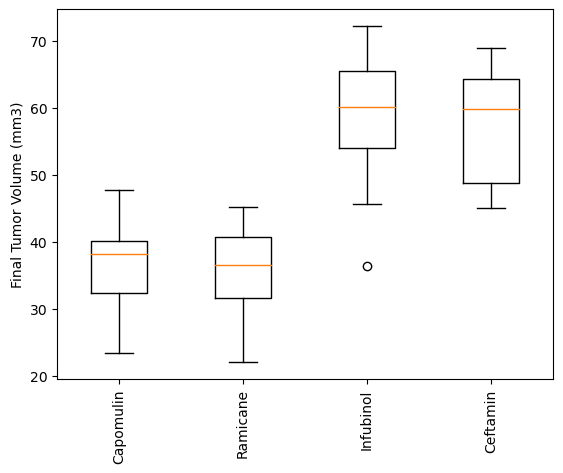

In [179]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumour_vol)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks(range(1,len(Treatments)+1), Treatments,rotation=90)
plt.show()

## Line and Scatter Plots

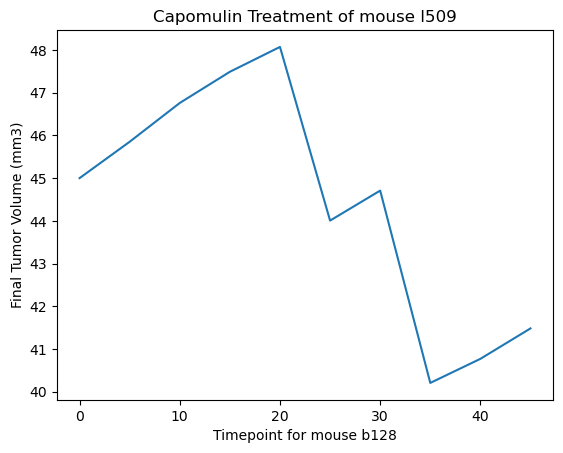

In [180]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_mouse = Mouse_study_details[["Tumor Volume (mm3)","Timepoint"]].loc[(Mouse_study_details["Drug Regimen"] =="Capomulin") & (Mouse_study_details["Mouse ID"] =="l509")]

Tumor_Volume_mm3 = Capomulin_mouse["Tumor Volume (mm3)"]
Timepoint = Capomulin_mouse["Timepoint"]
plt.plot(Timepoint,Tumor_Volume_mm3)
plt.title('Capomulin Treatment of mouse l509')
plt.xlabel('Timepoint for mouse b128')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

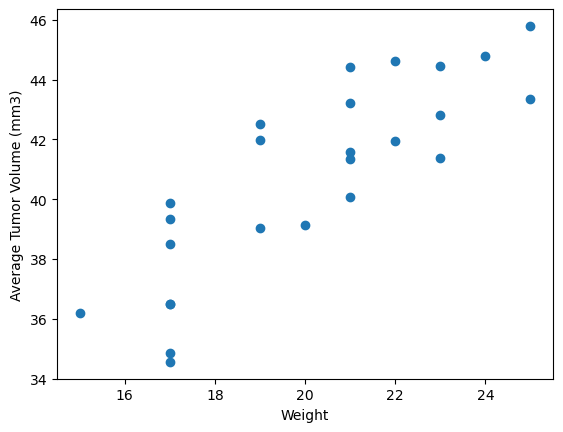

In [181]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_treatment = Mouse_study_details.loc[(Mouse_study_details["Drug Regimen"] =="Capomulin")]
avg_tumorvol_vs_weight = Capomulin_treatment.rename(columns={"Weight (g)": "Weight", "Tumor Volume (mm3)":"Tumor_Volume_mm3"})

avg_tumorvol_vs_weight = avg_tumorvol_vs_weight[["Tumor_Volume_mm3","Mouse ID","Weight"]].groupby(["Mouse ID","Weight"]).Tumor_Volume_mm3.mean()
avg_tumorvol_vs_weight = avg_tumorvol_vs_weight.to_frame().reset_index()
avg_tumorvol_vs_weight.head()
Weight = avg_tumorvol_vs_weight["Weight"]
Tumor_Volume_mm3 = avg_tumorvol_vs_weight["Tumor_Volume_mm3"]
plt.scatter(Weight,Tumor_Volume_mm3)
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694721


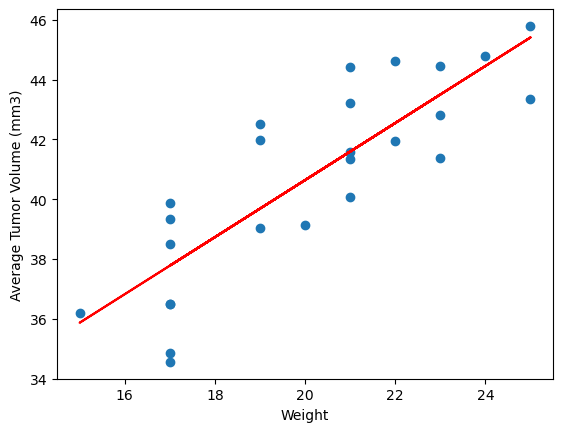

In [182]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(Weight,Tumor_Volume_mm3)
regress_values = Weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Weight,Tumor_Volume_mm3)
plt.plot(Weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {rvalue}")
plt.show()